# Big Data Exercises

In these exercises we will work on data from a series of global weather monitoring stations used to measure climate trends to examine long-term trends in temperature for your home locality. This data comes from the Global Historical Climatology Network, and is the actual raw data provided by NOAA. The only changes I have made to this data are a few small formatting changes to help meet the learning goals of this exercise. 

To do these excercises, first please download the data for this exercise [from here](https://www.dropbox.com/s/oq36w90hm9ltgvc/global_climate_data.zip?dl=0). Note this is a big file (this is a big-data exercise, after all), so be patient. 

**(1)** The data we'll be working with can be found in the file `ghcnd_daily.tar.gz`. It includes daily weather data from thousands of weather stations around the work over many decades. 

Begin by unzipping the file and checking it's size -- it should come out to be *about* 4gb, but will expand to about 12 gb in RAM, which means there's just no way most students (who usually have, at most, 16gb of RAM) can import this dataset into pandas and manipulate it directly. 

(Note: what we're doing can be applied to much bigger datasets, but they sometimes takes hours to work with, so we're working with data that's just a *little* big so we can get exercises done in reasonable time).  

### Note:
After downloading the folder and unzipping it, we can confirm that it was about 4GB and expanded to 12GB.

In [26]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
pd.set_option("mode.copy_on_write", True)

**(2)** Thankfully, we aren't going to be working with *all* the data today. Instead, everyone should pick three weather stations to examine during this analysis. 

To pick your stations, we'll need to open the `ghcnd-stations.txt` file in the directory you've downloaded. It includes both station codes (which is what we'll find in the `ghcnd_daily.csv` data, as well as the name and location of each station). 

When picking a weather station, make sure to pick one flagged as being in either GSN, HCN, or CRN (these designate more formalized stations that have been around a long time, ensuring you'll get a station with data that has been recorded over a longer period). 

Note that Station IDs start with the two-letter code of the country in which they are located, and the "NAME" column often constains city names. 

**The `ghcnd-stations.txt` is a "fixed-width" dataset,** meaning that instead of putting commas or tabs between observations, all columns have the same width (in terms of number of characters). So to import this data you'll have to (a) read the notes about the data in the project README.txt, and (b) read about how to read in fixed-width data in pandas. When entering column specifications, remember that normal people count from 1 and include end points, while Python counts from 0 and doesn't include end points (so if the readme says data is in columns 10-20, in Python that'd be 9 through 20). 

In [27]:
# Adjusted column widths as described
col_widths = [
    (0, 11),
    (12, 20),
    (21, 30),
    (31, 37),
    (38, 40),
    (41, 71),
    (72, 75),
    (76, 79),
    (80, 85),
]

# Adjusted column names
col_names = [
    "ID",
    "LATITUDE",
    "LONGITUDE",
    "ELEVATION",
    "STATE",
    "NAME",
    "GSN_FLAG",
    "HCN_CRN_FLAG",
    "WMO_ID",
]

# Read the fixed-width file
stations = pd.read_fwf(
    "ghcnd-stations.txt", colspecs=col_widths, header=None, names=col_names
)

# Filter for stations flagged as GSN, HCN, or CRN
filtered_stations = stations[
    (stations["GSN_FLAG"] == "GSN")
    | (stations["HCN_CRN_FLAG"] == "HCN")
    | (stations["HCN_CRN_FLAG"] == "CRN")
]

# Display the first few rows to pick stations
filtered_stations.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN_FLAG,HCN_CRN_FLAG,WMO_ID
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
6,AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
10,AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0
11,AG000060590,30.5667,2.8667,397.0,NaN,EL-GOLEA,GSN,NaN,60590.0
12,AG000060611,28.0500,9.6331,561.0,NaN,IN-AMENAS,GSN,NaN,60611.0


**(3)** Now that we something about the observations we want to work with, we can now turn to our actual weather data. 

Our daily weather can be found in `ghcnd_daily.csv`, which you get by unzipping `ghcnd_daily.tar.gz`. Note that the README.txt talks about this being a fixed-width file. Since you've already dealt with one fixed-width file, I've just converted this to a CSV, and dropped all the data that isn't "daily max temperatures". 

Let's start with the fun part. **SAVE YOUR NOTEBOOK AND ANY OTHER OPEN FILES!**. Then just try and import the data (`ghcnd_daily.csv`) while watching your Activity Monitor (Mac) or Resource Monitor (Windows) to see what happens.  

If you have 8GB of RAM, this should fail miserably. 

If you have 16GB of RAM, you might just get away with this. But if it *does* load, try sorting the data by year and see how things go. 

(If you have 32GB of RAM: you're actually probably fine with data this size. Sorry -- datasets big enough to cause big problems for people with 32GB take a long time to chunk on an 8GB computer, and these exercises have to be fast enough to finish in a class period! There are some exercises at the bottom with a REALLY big dataset you can work with.)

You may have to kill your kernel, kill VS Code, and start over when this explodes...

In [28]:
# Attempt to load the dataset
# try:
#     data = pd.read_csv("ghcnd_daily.csv")
#     print("Data loaded successfully!")
# except Exception as e:
#     print("Failed to load data:", e)

**By trying to import the dataset, my computer goes crazy hot.**

**(4)** Now that we know that we can't work with this directly, it's good with these big datasets to just import ~200 lines so you can get a feel for the data. So load *just 200 lines* of `ghcnd_daily.csv`.

In [29]:
# Load just the first 200 lines
data_sample = pd.read_csv("ghcnd_daily.csv", nrows=200)

# Display the first few rows of the sample data
data_sample.head()

,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
0,ACW00011604,1949,1,TMAX,289,NaN,NaN,X,289,NaN,...,NaN,X,272,NaN,NaN,X,272,NaN,NaN,X
1,ACW00011604,1949,2,TMAX,267,NaN,NaN,X,278,NaN,...,NaN,NaN,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
2,ACW00011604,1949,3,TMAX,272,NaN,NaN,X,289,NaN,...,NaN,X,278,NaN,NaN,X,267,NaN,NaN,X
3,ACW00011604,1949,4,TMAX,278,NaN,NaN,X,283,NaN,...,NaN,X,289,NaN,NaN,X,-9999,NaN,NaN,NaN
4,ACW00011604,1949,5,TMAX,283,NaN,NaN,X,283,NaN,...,NaN,X,294,NaN,NaN,X,300,NaN,NaN,X


In [30]:
print(station_data.columns)

Index(['id', 'year', 'month', 'avg_max_temp'], dtype='object')


**(5)** Once you have a sense of the data, write code to chunk your data: i.e. code that reads in all blocks of the data that will fit in ram, keeps only the observations for the weather stations you've selected to focus on, and throws away everything else.

In addition to your own three weather stations, please also include station USC00050848 (a weather station from near my home!) so you can generate results that we can all compare (to check for accuracy). 

Note you will probably have to play with your chunk sizes (probably while watching your RAM usage?). That's because small chunk sizes, while useful for debugging, are very slow. 

Every time Python processes a chunk, there's a fixed processing cost, so in a dataset with, say, 10,000,000 rows, if you try to do chunks of 100 rows, that fixed processing cost has to be paid 100,000 times. Given that, the larger you can make your chunks the better, so long as your chunks don't use up all your RAM. Again, picking a chunk size then watching your RAM usage is a good way to see how close you are to the limits of your RAM.

In [31]:
chunks = []

ghcnd_list = ["USC00050848", "USC00506727", "USC00505845", "USC00505644"]

for chunk in pd.read_csv("ghcnd_daily.csv", chunksize=10000):
    dtype = ("ID", str)
    ghcnd_chunk = chunk[chunk.id.isin(ghcnd_list)]
    chunks.append(ghcnd_chunk)

**(6)** Now, for each weather station, figure out the *earliest* year with data. Keep `USC00050848` and the two of the three weather stations you picked with the best data (i.e., you should have 3 total, two you picked and `USC00050848`).

In [32]:
# Define the weather stations of interest
stations = ["USC00050848", "USC00506727", "USC00505845"]

# Initialize a dictionary to hold the earliest year for each station
earliest_years = {station: None for station in stations}

# Process the data in chunks
chunk_size = 10000  # Adjust the chunk size based on your system's capabilities
chunks = []

for chunk in pd.read_csv("ghcnd_daily.csv", chunksize=chunk_size):
    # Convert the 'year' column to integer
    chunk["year"] = chunk["year"].astype(int)

    # Filter for the stations of interest
    ghcnd_chunk = chunk[chunk["id"].isin(stations)]

    # Append the filtered chunk to the list
    chunks.append(ghcnd_chunk)

# Concatenate all the filtered chunks
filtered_data = pd.concat(chunks)

# Find the earliest year for each station
for station in stations:
    station_data = filtered_data[filtered_data["id"] == station]
    if not station_data.empty:
        min_year = station_data["year"].min()
        if earliest_years[station] is None or min_year < earliest_years[station]:
            earliest_years[station] = min_year

# Print the earliest year with data for each station
for station, year in earliest_years.items():
    print(f"The earliest year with data for station {station} is {year}")

The earliest year with data for station USC00050848 is 1893
The earliest year with data for station USC00506727 is 1923
The earliest year with data for station USC00505845 is 1982


**(7)** Now calculate the average max temp for each weather station / month in the data. Note that in a few weeks, we'll have the skills to do this by reshaping our data so each row is a single day, rather than a month. But for the moment, just sum the columns, watching out for weird values. 

To sum across the value columns, we can combine: 

```python
weather_data.filter(like='value')
```

(to just get the columns whose names start with "value") with `.mean(axis='columns')` (which averages across columns (along rows) rather than the usual averaging across rows (along columns). 

In [33]:
# Filter the dataset for max temperature values and average them by month for each station
average_max_temps = (
    filtered_data.groupby(["id", "year", "month"])
    .apply(
        lambda df: df.filter(like="value")
        .replace(-9999, pd.NA)
        .mean(axis="columns")
        .mean()
    )
    .reset_index(name="avg_max_temp")
)

# Display the result
print(average_max_temps)

               id  year  month  avg_max_temp
0     USC00050848  1893     10    177.806452
1     USC00050848  1893     11    103.533333
2     USC00050848  1893     12     93.066667
3     USC00050848  1894      1     61.541667
4     USC00050848  1894      2     27.761905
...           ...   ...    ...           ...
1860  USC00506727  1972      6     59.384615
1861  USC00506727  1972      7    119.548387
1862  USC00506727  1972     11     -5.033333
1863  USC00506727  1972     12    -69.250000
1864  USC00506727  1973      2    -62.880000

[1865 rows x 4 columns]


**(8)** Now for each weather station, generate a separate plot of the daily temperatures over time. You should end up with a plot that looks something like this:

![temp_plots_Colorado](images/temp_plots_Boulder_CO.png)

**NOTE:** If your plot has little horizontal lines at the tops and bottoms of the temperature plots connecting perfectly vertical temperature lines, it means you made a mistake in how you plotted your data!

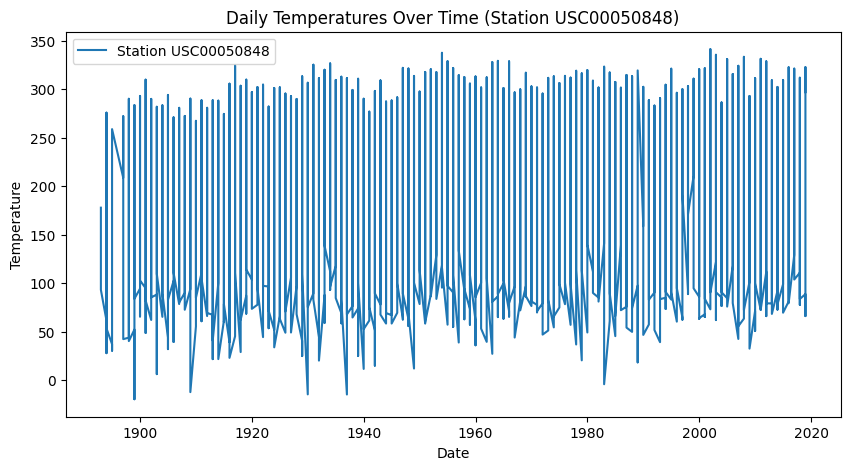

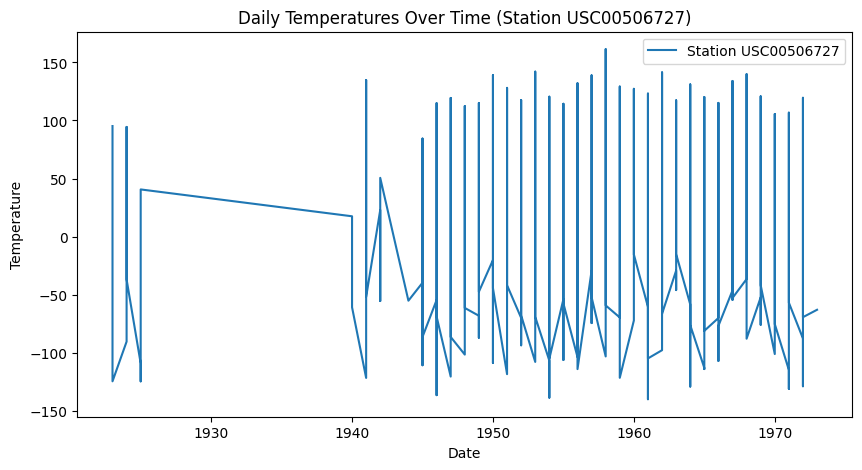

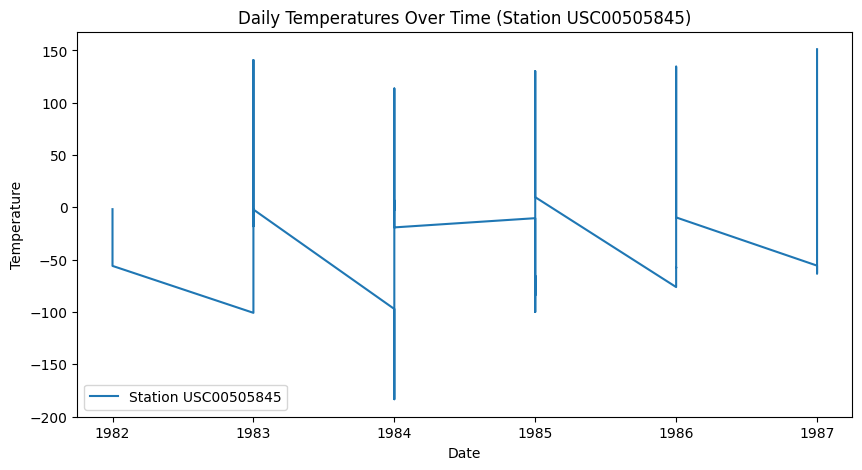

In [49]:
import matplotlib.pyplot as plt

# Iterate over the stations
for station in stations:
    # Filter data for the current station
    station_data = average_max_temps[average_max_temps["id"] == station]
    # Create a time series plot
    plt.figure(figsize=(10, 5))
    plt.plot(
        station_data["year"], station_data["avg_max_temp"], label=f"Station {station}"
    )
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title(f"Daily Temperatures Over Time (Station {station})")
    plt.legend()
    plt.show()

## Want More Practice?

If you *really* want a challenge, the file `ghcnd_daily_30gb.tar.gz` will decompress into `ghcnd_daily.dat`, the full version of the GHCND daily data. It contains not only daily high temps, but also daily low temps, preciptionation, etc. Moreover, it is still in fixed-width format, and is about 30gb in raw form. 

Importing and chunking this data (with moderate optimizations) took about 2 hours on my computer. 

If you're up for it, it's a great dataset to wrestling with data in weird formats and chunking. 

**Pro-tip:** strings take up *way* more space in RAM than numbers, so some columns can be converted to keep the memory footprint of the data down. 